In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC


In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [4]:
dummy_species = pd.get_dummies(df.Species)
dummy_species


,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [5]:
concat_column = pd.concat([df, dummy_species], axis = 'columns')
concat_column

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0,0,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0,0,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0,0,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0,0,1


In [6]:
concat_column

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0,0,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0,0,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0,0,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0,0,1


In [7]:
from sklearn.model_selection import train_test_split
X= concat_column.drop(['Species'], axis='columns')
y= df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {log_reg_accuracy}')


Logistic Regression Accuracy: 1.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
y_prediction = log_reg.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(33.22222222222222, 0.5, 'truth')

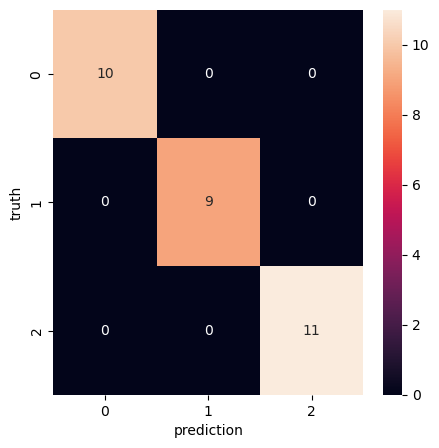

In [14]:
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(cm, annot=True)
plt.xlabel('prediction')
plt.ylabel('truth')

In [16]:
#decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
print(f'Decision Tree Accuracy: {decision_tree_accuracy}')

Decision Tree Accuracy: 1.0


In [17]:
y_prediction = decision_tree.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [20]:
#Random_Forrest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)
print(f'Random Forest Accuracy: {random_forest_accuracy}')


Random Forest Accuracy: 1.0


In [21]:
y_prediction = random_forest.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [22]:
#SVM model
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {svm_accuracy}')


SVM Accuracy: 1.0


In [25]:
y_prediction = svm_model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [27]:
model_accuracies = {
    'Logistic Regression': log_reg_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Random Forest': random_forest_accuracy,
    'SVM model': svm_accuracy
}

print(model_accuracies)

{'Logistic Regression': 1.0, 'Decision Tree': 1.0, 'Random Forest': 1.0, 'SVM model': 1.0}
